In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
BATCH_SIZE=32
IMAGE_SIZE=256
CHANNELS=3
EPOCHS=30

In [3]:
print(tf.__version__)

2.14.0


In [4]:
dataset=tf.keras.utils.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
)

Found 4352 files belonging to 15 classes.


In [5]:
class_names = dataset.class_names
class_names

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [6]:
# Get a batch of images and labels
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[ 2  8  7 14 12  2  0 14 11  1  3 14  0  2 12  2 14  2  6 13 14 12  5  0
  8  1  0  2  7  0  4  1]


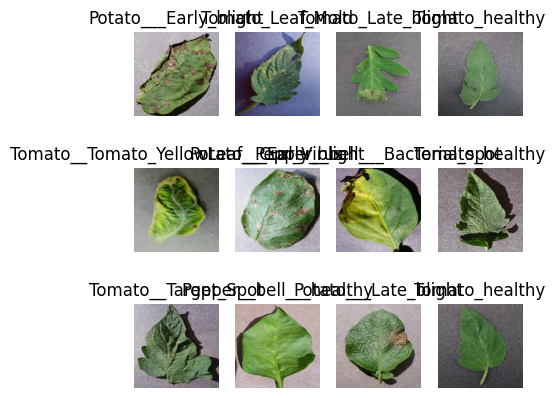

In [7]:
# Create a figure
plt.figure(figsize=(5, 5))

# Plot the images in a 3x4 grid
for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[labels_batch[i]])
    plt.axis("off")

plt.show()

In [8]:
len(dataset)

136

In [9]:
#we have this many images
102*32

3264

In [12]:
def get_dataset_partition_tf(ds, train_split=0.8, test_split=0.1, val_split=0.1, shuffle=True, buffer_size=2048):
    assert((train_split+test_split+val_split)==1)
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle( buffer_size, seed=123 )
    train_size=int(ds_size*train_split)
    val_size=int(ds_size*val_split)

    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)

    return train_ds,val_ds,test_ds

    

In [13]:
train_ds,val_ds,test_ds=get_dataset_partition_tf(dataset)

In [14]:
len(train_ds)

108

In [15]:
len(val_ds)

13

In [16]:
len(test_ds)

15

In [17]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [18]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[128. 131. 138.]
  [132. 135. 142.]
  [136. 139. 146.]
  ...
  [121. 120. 128.]
  [120. 119. 127.]
  [114. 113. 121.]]

 [[134. 137. 144.]
  [135. 138. 145.]
  [136. 139. 146.]
  ...
  [122. 121. 129.]
  [121. 120. 128.]
  [116. 115. 123.]]

 [[137. 140. 147.]
  [135. 138. 145.]
  [132. 135. 142.]
  ...
  [122. 121. 129.]
  [121. 120. 128.]
  [119. 118. 126.]]

 ...

 [[113. 119. 119.]
  [110. 116. 116.]
  [107. 113. 113.]
  ...
  [ 73.  78.  81.]
  [ 73.  78.  81.]
  [ 73.  78.  81.]]

 [[109. 115. 115.]
  [109. 115. 115.]
  [110. 116. 116.]
  ...
  [ 74.  79.  82.]
  [ 70.  75.  78.]
  [ 67.  72.  75.]]

 [[101. 107. 107.]
  [106. 112. 112.]
  [112. 118. 118.]
  ...
  [ 81.  86.  89.]
  [ 77.  82.  85.]
  [ 73.  78.  81.]]]


In [19]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [20]:
data_augmentation=tf.keras.Sequential([
    layers.RandomFlip('horizontal_and_vertical'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
])

In [21]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=15
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])
model.build(input_shape=input_shape)

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 32)          0         
 g2D)                                                 

In [23]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'],
)

In [24]:
history= model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS
)

Epoch 1/30
108/108 [==============================] - 220s 2s/step - loss: 2.6679 - accuracy: 0.0926 - val_loss: 2.5861 - val_accuracy: 0.1178
Epoch 2/30
108/108 [==============================] - 192s 2s/step - loss: 2.4689 - accuracy: 0.1768 - val_loss: 2.3384 - val_accuracy: 0.2524
Epoch 3/30
108/108 [==============================] - 186s 2s/step - loss: 2.0822 - accuracy: 0.3166 - val_loss: 2.1158 - val_accuracy: 0.3029
Epoch 4/30
108/108 [==============================] - 177s 2s/step - loss: 1.8559 - accuracy: 0.3773 - val_loss: 1.8151 - val_accuracy: 0.3726
Epoch 5/30
108/108 [==============================] - 188s 2s/step - loss: 1.5936 - accuracy: 0.4531 - val_loss: 2.4232 - val_accuracy: 0.3990
Epoch 6/30
108/108 [==============================] - 181s 2s/step - loss: 1.4798 - accuracy: 0.4983 - val_loss: 1.7322 - val_accuracy: 0.4760
Epoch 7/30
108/108 [==============================] - 182s 2s/step - loss: 1.3531 - accuracy: 0.5405 - val_loss: 1.2685 - val_accuracy: 0.5793

In [25]:
score=model.evaluate(test_ds)

15/15 [==============================] - 21s 320ms/step - loss: 0.8069 - accuracy: 0.7646


In [26]:
score

[0.806940495967865, 0.7645833492279053]

In [27]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc= history.history['accuracy']
val_acc = history.history['val_accuracy']

Text(0.5, 1.0, 'training and validation loss')

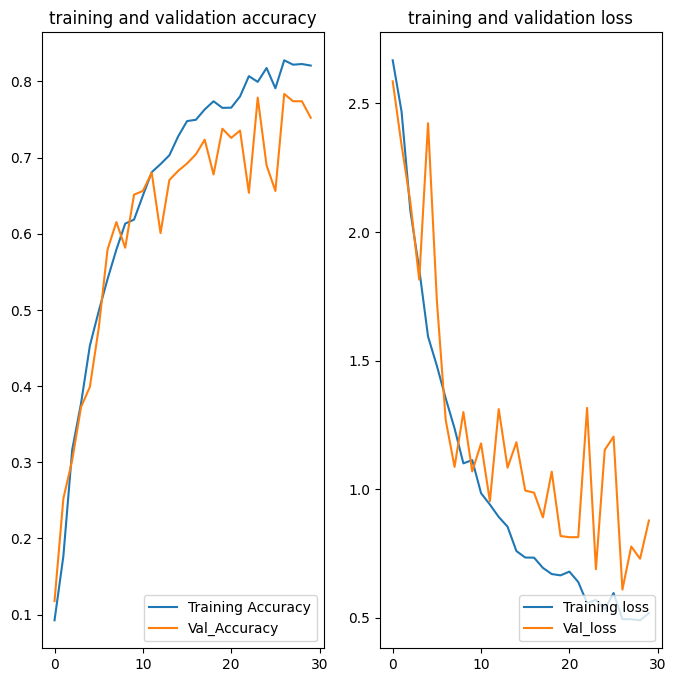

In [28]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label="Training Accuracy")
plt.plot(range(EPOCHS),val_acc,label='Val_Accuracy')
plt.legend(loc='lower right')
plt.title("training and validation accuracy")

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label="Training loss")
plt.plot(range(EPOCHS),val_loss,label='Val_loss')
plt.legend(loc='lower right')
plt.title("training and validation loss")

First img to predict
1/1 [==============================] - 1s 1s/step
Pepper__bell___healthy


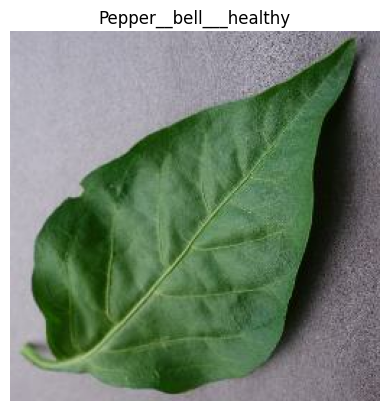

In [29]:
import numpy as np
for image_batch, labels_batch in test_ds.take(1):
    print("First img to predict")
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[labels_batch[0]])
    batch_prediction = model.predict(image_batch)
    print(class_names[np.argmax(batch_prediction[0])])
    plt.axis("off")

plt.show()

In [30]:
import numpy as np
def predict_one(model,img):
    img_array= tf.keras.utils.img_to_array(img.numpy())
    img_array = tf.expand_dims(img_array,0)

    predictions=model.predict(img_array)

    predicted_class=class_names[np.argmax(predictions[0])]
    confidence= round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 [==============================] - 0s 35ms/step


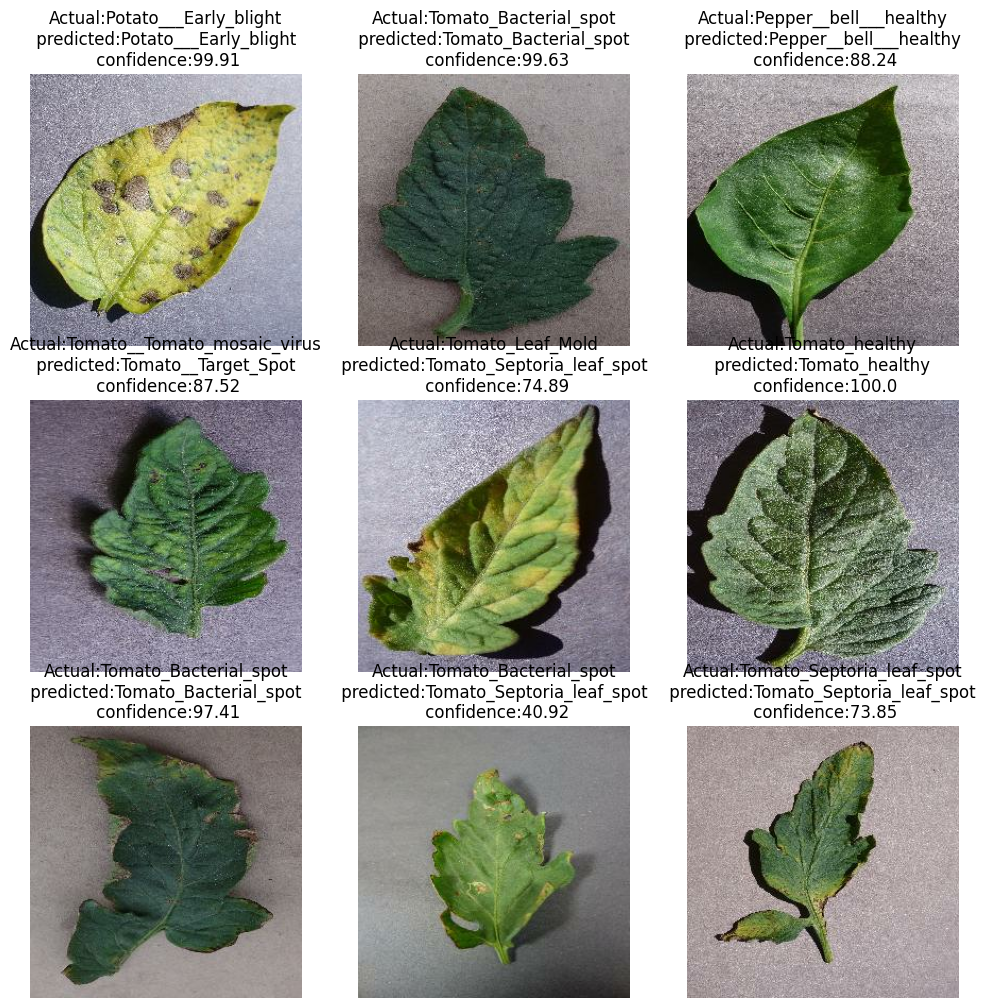

In [31]:
plt.figure(figsize=(12,12))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class,confidence = predict_one(model,images[i])
        actual_class=class_names[labels[i]]
        plt.title(f"Actual:{actual_class}\n predicted:{predicted_class} \n confidence:{confidence}")
        plt.axis("off")
        
        

In [ ]:
modelver = 2
model.save(f"../models/{modelver}") #to save in savemodel format

INFO:tensorflow:Assets written to: ./models/2\assets


INFO:tensorflow:Assets written to: ./models/2\assets


Saved artifact at './models/2'. The following endpoints are available:

* Endpoint 'serve'
  Args:
    args_0: float32 Tensor, shape=(None, 256, 256, 3)
  Returns:
    float32 Tensor, shape=(None, 15)


In [ ]:
modelver = 1
model.save(f"../models-served/{modelver}.keras") 